In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics
from matplotlib import pyplot
import pandas_profiling
from imblearn.over_sampling import SMOTE

In [2]:
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

## 1

In [3]:

breast_train = pd.read_csv('/Users/jeandre/Desktop/Applied Machine Learning/Post Block Assignemnt 1/breastCancerTrain.csv', sep='\t')

In [4]:
breast_test = pd.read_csv('/Users/jeandre/Desktop/Applied Machine Learning/Post Block Assignemnt 1/breastCancerTest.csv', sep='\t')

In [5]:
breast = pd.concat([breast_test,breast_train])
breast.replace('?',value = np.nan,inplace=True)

In [6]:
print(type(breast))

<class 'pandas.core.frame.DataFrame'>


In [7]:
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,gender,Bratio
0,842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,...,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902,F,0.065443
1,843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,...,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,F,0.481372
2,84610002,M,15.78,17.89,103.6,781,0.0971,0.1292,0.09954,0.06606,...,136.5,1299,0.1396,0.5609,0.3965,0.181,0.3792,0.10480,F,0.789345
3,846381,M,15.85,23.95,103.7,782.7,0.08401,0.1002,0.09938,0.05364,...,112,876.5,0.1131,0.1924,0.2322,0.1119,0.2809,0.06287,F,0.532400
4,8510824,B,9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,...,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.245,0.07773,F,0.475519


In [8]:
breast.dropna(inplace=True)
breast.drop('gender',axis=1,inplace =True)
column_list = list(breast.columns.values)
column_list.remove('id')
column_list.remove('diagnosis')
print(column_list)
for col in column_list:
    breast[col] = pd.to_numeric(breast[col], downcast="float")

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Bratio']


# General data quality issues:
- Double Tabbed heading in a tab delimited file.
- Gender column contains only female entries.
- All columns contain mixed data types; strings and numbers.
- Some values in columns are represented as a question mark.
- Large outlier in smoothness_mean
- Eleven entries contain only zeros for six features.
- Skew class distribution, 50% more negative cases than positive.

## 2


a)
## Issues addressed to enable analysis:
- Double tabbed heading fixed and csv succesfully read into pandas.without doing this the data was impossible to manipulate.
- cast mixed data types to float except for id and diagnosis. Mixed data types are difficult to work with in terms of visulizations etc.
- drop gender feature since all entries are female. Does not provide any information.
- replaced all question marks with NaN and then dropped any rows containing NaN. This takes the datset from 569 entries to 457 entries. Question marks are not valid inputs for our modelling process.

## Issues found in analysis
- Extreme large outlier in smoothness_mean, only one such outlier. Remove since it only affects a single row
- 6 Features containing 11 zeros:
"\[concavity_mean , concave points_mean , concabity_se ,
concave_points_se , concavity_worst , concave points_worst]"
Wont be changing these entries since the features are all very low valued.

## b)
### any other transform:
Remove ID since it is unique for every entry

Carry out the fixes onto the individual train and test sets.
Previously only implemented on the two sets combined.

In [9]:
for df in [breast_test,breast_train]:    
    df.replace('?',value = np.nan,inplace=True)
    df.dropna(inplace=True)
    df.drop('gender',axis=1,inplace =True)
    column_list = list(df.columns.values)
    column_list.remove('id')
    column_list.remove('diagnosis')
    for col in column_list:
        df[col] = pd.to_numeric(df[col], downcast="float")

c)

In [10]:
X_test = breast_test[list(breast_test.columns[2:33])]
X_train = breast_train[list(breast_train.columns[2:33])]
X_train # check that we have the correct columns

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Bratio
0,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.330000,184.600006,2019.000000,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0.162878
1,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.530001,152.500000,1709.000000,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0.751106
2,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.500000,98.870003,567.700012,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0.465537
3,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.670000,152.199997,1575.000000,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0.969993
5,13.710000,20.830000,90.199997,577.900024,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.139999,110.599998,897.000000,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0.440695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,9.333000,21.940001,59.009998,264.000000,0.09240,0.05605,0.03996,0.01282,0.1692,0.06576,...,25.049999,62.860001,295.799988,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393,0.217251
385,11.200000,29.370001,70.669998,386.000000,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.299999,75.190002,439.600006,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,0.228154
386,15.220000,30.620001,103.400002,716.900024,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.790001,128.699997,915.000000,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090,0.435295
387,20.129999,28.250000,131.199997,1261.000000,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.250000,155.000000,1731.000000,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,0.164469


In [11]:
Y_test = breast_test["diagnosis"]
Y_train = breast_train["diagnosis"]

values = {'B':1, 'M':0}

Y_test = Y_test.map(values)
Y_train = Y_train.map(values)
Y_train

0      0
1      0
2      0
3      0
5      0
      ..
379    1
385    1
386    0
387    0
388    0
Name: diagnosis, Length: 294, dtype: int64

### Classification tree approach:

A classification tree is trained to overfit on the training set. This is done by splitting the dataset further and further untill each subset is as homogeneous as possible i.e. contains only one class with each split attempting to maximize the homogeneity in the following subsets.

The approach to finding optimal splits is a recursive one by which the function splits the set into subsets recursively untill they are homogeneous at which point the recursion ends.

In [12]:
treeinst = tree.DecisionTreeClassifier(random_state=0)
treeclf = treeinst.fit(X_train, Y_train)
D_pred = treeclf.predict(X_test)
print("Accuracy score =",sklearn.metrics.accuracy_score(Y_test,D_pred))
print("Precision score =",sklearn.metrics.precision_score(Y_test,D_pred,average='weighted'))
print("Recall = ",sklearn.metrics.recall_score(Y_test,D_pred,average='weighted'))

Accuracy score = 0.8834355828220859
Precision score = 0.8838572402376083
Recall =  0.8834355828220859


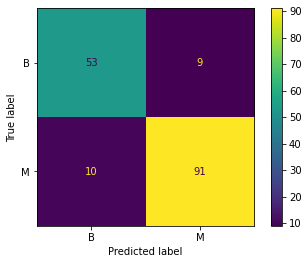

In [13]:
sklearn.metrics.plot_confusion_matrix(treeclf,X_test,Y_test,display_labels=values) # TEST SET

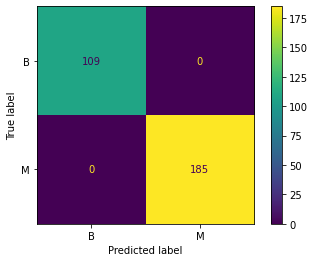

In [14]:
sklearn.metrics.plot_confusion_matrix(treeclf,X_train,Y_train,display_labels=values) # TRAIN SET

Complete overfit on the training set

d)

### Post Pruning process used:
Minimal cost-complexity pruning.

Minimal cost complexity uses cost complexity defined as: $R_\alpha(T) = R(T) + \alpha|\widetilde{T}|$  where T is a given tree and $\tilde{T}$ being the number of terminal nodes.

As the name implies this method aims to minimize the $R_\alpha(T)$ of a tree. This is done by evaluating the cost complexity of a node and using the equation $\alpha_{eff}(t)=\frac{R(t)-R(T_t)}{|T|-1}$ to calculate $\alpha_{eff}(t)$, a non terminal node with the lowest value for $\alpha_{eff}(t)$ will be the weakest link and pruned. The pruning process continues untill the value for $\alpha_{eff}(t)$ is greater than ccp_alpha


In [15]:
path = treeclf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [16]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

In [17]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

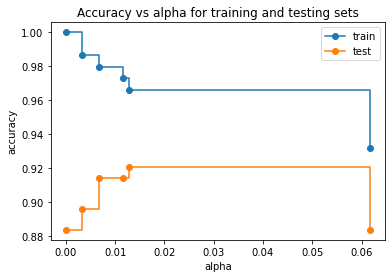

In [18]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [19]:
print(ccp_alphas)

[0.         0.00332701 0.00665951 0.01166181 0.01276977 0.06172553]


alpha = 0.0128 provides the best test accuracy

In [20]:
ccp_alpha = ccp_alphas[4]
print(ccp_alpha)

0.012769774214623466


In [21]:
treeinst = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
treeclf = treeinst.fit(X_train, Y_train)
D_pred = treeclf.predict(X_test)
print("Accuracy score =",sklearn.metrics.accuracy_score(Y_test,D_pred))
print("Precision score =",sklearn.metrics.precision_score(Y_test,D_pred,average='weighted'))
print("Recall = ",sklearn.metrics.recall_score(Y_test,D_pred,average='weighted'))
sklearn.metrics.confusion_matrix(Y_test,D_pred)

Accuracy score = 0.9202453987730062
Precision score = 0.9201014229609425
Recall =  0.9202453987730062


array([[54,  8],
       [ 5, 96]])

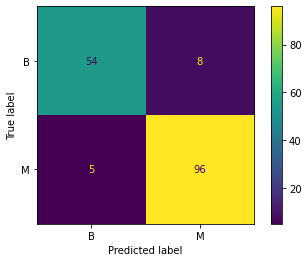

In [22]:
sklearn.metrics.plot_confusion_matrix(treeclf,X_test,Y_test,display_labels=values) # TEST SET

54/62= 87.1% accuracy for B

96/101 = 95% accuracy for M

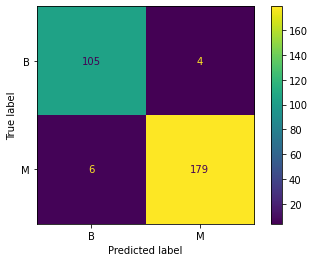

In [23]:
sklearn.metrics.plot_confusion_matrix(treeclf,X_train,Y_train,display_labels=values) # TRAIN SET

e) 
Pruning helps provide a more accurate model by eliminating nodes that contribute the most to overfitting the training set, i.e. pruning eliminates the nodes that contain outliers. As a result of the pruning the tree becomes less overfitted and therefore a more generalized model which improves accuracy overall and on the testing set.

## 3) KNN 

### Data Quality issues:
Many of the same as the Decision tree including:

- Double tabbed heading fixed and csv succesfully read into pandas.without doing this the data was impossible to manipulate.
- cast mixed data types to float except for id and diagnosis. Mixed data types are difficult to work with in terms of visulizations etc.
- drop gender feature since all entries are female. Does not provide any information.
- replaced all question marks with NaN and then dropped any rows containing NaN. This takes the datset from 569 entries to 457 entries. Question marks are not valid inputs for our modelling process.

## Issues found in analysis
- Extreme large outlier in smoothness_mean, only one such outlier. Remove since it only affects a single row
- 6 Features containing 11 zeros:
"\[concavity_mean , concave points_mean , concabity_se ,
concave_points_se , concavity_worst , concave points_worst]"
Wont be changing these entries since the features are all very low valued and could be valid entries.
- High noise in the data, will have to pick the right value for K to find a balance against robustness for noise and precision.

K is = 5
Accuracy score = 0.9263803680981595
Precision score = 0.9275045664157526
Recall =  0.9263803680981595


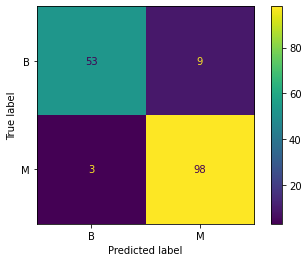

In [24]:
k=5
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train,Y_train)
K_pred = neigh.predict(X_test)
print("K is =",k)
print("Accuracy score =",sklearn.metrics.accuracy_score(Y_test,K_pred))
print("Precision score =",sklearn.metrics.precision_score(Y_test,K_pred,average='weighted'))
print("Recall = ",sklearn.metrics.recall_score(Y_test,K_pred,average='weighted'))
sklearn.metrics.plot_confusion_matrix(neigh,X_test,Y_test,display_labels=values)

53/62= 85.4% accuracy for B

98/101 = 97% accuracy for M

Given the setting with regards to breast cancer it is much more important to catch as many of the cases as possible of malignant tumors, having a few false alarms when misidentifying a benign tumor as malignant is worth it to have as few as possible malignant tumors slip through without identification. For this reason the KNN is the better solution as it has the better sensitivity to identifying malignant tumors while having around the same base accuracy score as the decision tree.
Only 3% of the malignant cases were missed in the KNN method versus 5% for the decision tree.